LAB 03

Hector Daniel Vargas Gonzales     
CU : 35-5218   
Ingenieria de Sistemas  

Juan Agustin Apaza Guzman   
CU : 35-5228
Ingenieria de Sistemas  

En este Laboratorio se realizo el calculo de Regresion Logistica con la ayuda de dataset: https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction

Hector GitHub: https://github.com/HD-VG/SIS420.git

Agustin GitHub: https://github.com/JuanApazaG/Laboratorios-SIS420.git

El data set trata del riesgo que puede tener un banco de perder clientes



Ecplicacion de las columnas de dataset
CreditScore: Es la puntuación crediticia del cliente. Un número que refleja la solvencia crediticia de la persona.

**Customer ID:** que es el id de las cuentas

**El RowNumber:** que es el numero de fila que se tiene

**Surname:** es el nombre de los clientes

**Geography:** Indica el país o la región geográfica donde reside el cliente.

**Gender:** Es el género del cliente (generalmente categorizado como 'Male' o 'Female').

**Age:** La edad del cliente.

**Tenure:** El número de años que el cliente ha sido cliente del banco.

**Balance:** El saldo de la cuenta del cliente.

**NumOfProducts:** El número de productos bancarios que el cliente ha adquirido (como cuentas, préstamos, tarjetas de crédito, etc.).

**HasCrCard:** Indica si el cliente tiene una tarjeta de crédito con el banco (1 si tiene, 0 si no).

**IsActiveMember:** Indica si el cliente es un miembro activo del banco (1 si es activo, 0 si no).

**EstimatedSalary:** El salario estimado del cliente.

**Exited:** Indica si el cliente ha abandonado el banco (1 si el cliente se ha ido, 0 si sigue siendo cliente).


conectamos con google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Realizamos las importaciones necesarias

In [2]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
#para lectura del dataset
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize
#para hace el corte de del 20 y 80 porciento
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

cargamos el data set

In [3]:
# Cargar el dataset usando pandas leemos el archivo de dataset
data = pd.read_csv('/content/drive/MyDrive/Tareas/Inteligencia artificial SIS420/Agustin/Laboratorio 3/Churn_Modelling.csv')


mostramos el dataset

In [4]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


eliminamos datos que no usaremos en el calculo  

*   el Customer ID .- que es el id de las cuentas
*   El RowNumber .-  que es el numero de fila que se tiene
*   El Surname .-  es el nombre de los clientes

In [5]:
data = data.drop(['CustomerId', 'RowNumber','Surname'], axis=1)

In [6]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


convertimos los paices y el genero de las personas a numeros

In [7]:
#leemos nuestro data con otra variable para hacer el cambio de cadena a numero
df = pd.read_csv('/content/drive/MyDrive/Tareas/Inteligencia artificial SIS420/Agustin/Laboratorio 3/Churn_Modelling.csv')

# Mostrar las primeras filas para asegurarnos de que se cargó correctamente
print(df.head())

# Convertir las columnas 'Geography' y 'Gender' a números
df['Geography_Numeric'] = df['Geography'].astype('category').cat.codes
df['Gender_Numeric'] = df['Gender'].astype('category').cat.codes
#ahora intercambiamos los datos numericos en nuestro data
data['Geography'] = df['Geography_Numeric']
data['Gender'] = df['Gender_Numeric']

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


El reto de este lab es separa el 20% de nuestro dataset para realizar las pruebas y poder sacer si esta prediciendo bien

In [9]:
# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# usamos la libreria train_test_split que nos ayudara a separar el 80% y 20% de los datos.
train_dataset, test_dataset = train_test_split(data, test_size=0.2, random_state=42)

#Separamos en X_test los datos, pero dropeando nuestra y que seria 'CARDIO_DISEASE'
X_test = test_dataset.drop(['Exited'], axis=1).values

#Separamos en y_test los datos, pero solo cargando la columna de 'CARDIO_DISEASE', ya que esa sera nuestra y
y_test = test_dataset['Exited'].values

# tomamos train_dataset, seleccionamos las columnas para X_train y la columna 'CARDIO_DISEASE' para y_train
X_train = train_dataset.drop(['Exited'], axis=1).values
y_train = train_dataset['Exited'].values
m_train = len(y_train)


#Imprimimos algunos datos:
# imprimir todos las X de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'Y'
))
print('-' * 110)

for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}{:10.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:8.0f}{:10.0f}{:8.0f}'.format(
        X_train[i, 0], X_train[i, 1], X_train[i, 2], X_train[i, 3], X_train[i, 4], X_train[i, 5], X_train[i, 6], X_train[i, 7], X_train[i, 8], X_train[i, 9], y_train[i]
    ))

#mostramos la cantidad de ejemplos
print(" ")
print('El 80% de ejemplos para entrenamiento son la cantidad de: {:.0f} de ejemplos'.format( len(train_dataset)))
print('El 20% de ejemplos para pruebas son la cantidad de: {:.0f} de ejemplos'.format( len(test_dataset)))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]         Y
--------------------------------------------------------------------------------------------------------------
     686       0         1        32       6       0       2       1       1    179093       0
     632       1         1        42       4  119625       2       1       1    195979       0
     559       2         1        24       3  114740       1       1       0     85891       1
     561       0         0        27       9  135637       1       1       0    153080       1
     517       0         1        56       9  142147       1       0       0     39488       1
     569       0         1        41       4  120243       1       1       0    163150       1
     683       0         0        40       1       0       2       0       0     75762       0
     759       0         0        45       8       0       2       1       1     99251       0
     426       0         0       

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [10]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Almacenando los datos normalizados en **X_norm** usando la funcion **featureNormaliza()**, normalizando los datos de X_train

mostramos los datos normalizados

In [11]:
X_norm, mu, sigma= featureNormalize(X_train)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}'.format(
        X_norm[i, 0], X_norm[i, 1], X_norm[i, 2], X_norm[i, 3], X_norm[i, 4], X_norm[i, 5], X_norm[i, 6], X_norm[i, 7], X_norm[i, 8], X_norm[i, 9]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]
--------------------------------------------------------------------------------------------------------------
   0.356  -0.906     0.913    -0.656   0.346  -1.218   0.808   0.649   0.975     1.368
  -0.204   0.302     0.913     0.295  -0.348   0.697   0.808   0.649   0.975     1.661
  -0.961   1.509     0.913    -1.416  -0.695   0.619  -0.917   0.649  -1.026    -0.253
  -0.941  -0.906    -1.095    -1.131   1.387   0.953  -0.917   0.649  -1.026     0.915
  -1.397  -0.906     0.913     1.626   1.387   1.057  -0.917  -1.540  -1.026    -1.060
  -0.858  -0.906     0.913     0.200  -0.348   0.707  -0.917   0.649  -1.026     1.090
   0.325  -0.906    -1.095     0.105  -1.389  -1.218   0.808  -1.540  -1.026    -0.429
   1.114  -0.906    -1.095     0.580   1.040  -1.218   0.808   0.649   0.975    -0.021
  -2.342  -0.906    -1.095    -0.466  -0.695  -1.218   0.808   0.649   0.975    -0.682
  -0.526  -0.906    

aniadimos una columna de 1 en la matriz con el fin de tener theta0

In [12]:
X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

# print(len(X_ready[0]))

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 130)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
        X_ready[i, 0], X_ready[i, 1], X_ready[i, 2], X_ready[i, 3], X_ready[i, 4], X_ready[i, 5], X_ready[i, 6], X_ready[i, 7], X_ready[i, 8], X_ready[i, 9], X_ready[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
----------------------------------------------------------------------------------------------------------------------------------
   1.000   0.356    -0.906     0.913  -0.656   0.346  -1.218   0.808   0.649     0.975   1.368
   1.000  -0.204     0.302     0.913   0.295  -0.348   0.697   0.808   0.649     0.975   1.661
   1.000  -0.961     1.509     0.913  -1.416  -0.695   0.619  -0.917   0.649    -1.026  -0.253
   1.000  -0.941    -0.906    -1.095  -1.131   1.387   0.953  -0.917   0.649    -1.026   0.915
   1.000  -1.397    -0.906     0.913   1.626   1.387   1.057  -0.917  -1.540    -1.026  -1.060
   1.000  -0.858    -0.906     0.913   0.200  -0.348   0.707  -0.917   0.649    -1.026   1.090
   1.000   0.325    -0.906    -1.095   0.105  -1.389  -1.218   0.808  -1.540    -1.026  -0.429
   1.000   1.114    -0.906    -1.095   0.580   1.040  -1.218   0.808   0.649     0.975  -0.021
   1.000  -2.

También conocida como la función logística, es una función matemática que toma cualquier número real como entrada y devuelve un valor en el rango de 0 a 1. Donde nuestra **Z** es nuestra hipotesis.

In [13]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

probamos la funcion de la sigmoid con el valor 0 el cual debe arrojar 0,5

In [14]:
print(sigmoid(0))

0.5


con otros valores

In [15]:
print(sigmoid(34))
print(sigmoid(56))
print(sigmoid(112))
print(sigmoid(8))
print(sigmoid(98))

0.9999999999999982
1.0
1.0
0.9996646498695336
1.0


Calculo del Desenso por el Gradiente

Funcion del costo

In [16]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0

    #hacemos el uso de la funcion sigmoid
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [17]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [ ]:
#creamos un theta con 19 columnas de ceros
theta = np.zeros(len(X_ready[0]))

#numero de iteraciones sera 900 y un alpha 0.009
num_ite = 80000
alpha = 0.001

theta, J_historico = descensoGradiente(theta, X_ready, y_train, alpha, num_ite)

print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

########################################################################################################
Los valores de theta calculados son:
theta 1: -1.614159749782657
theta 2: -0.06722237095696794
theta 3: 0.08951725161108494
theta 4: -0.2695333907414097
theta 5: 0.7541434692578208
theta 6: -0.040254761028034616
theta 7: 0.3024148601589276
theta 8: -0.027500965418791472
theta 9: -0.00329917493617635
theta 10: -0.5354738722827554
theta 11: 0.01918741996605459
########################################################################################################
con un costo de: 0.43789593427033724 


Text(0, 0.5, 'Costo J')

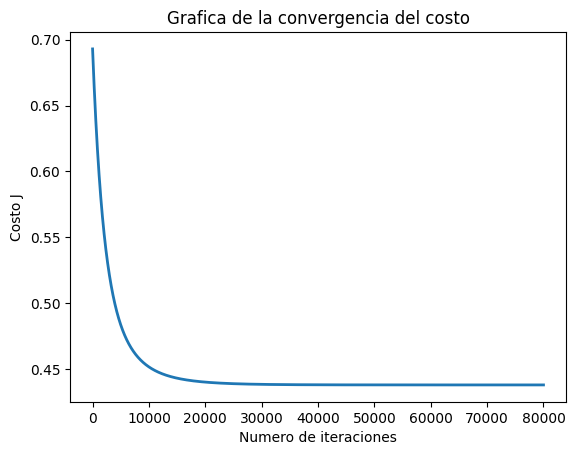

In [ ]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
pyplot.title("Grafica de la convergencia del costo")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

probamos con un ejemplo

In [ ]:
X_array = [1,68,0,1,32,5,0,2,1,0,18888]
X_array_copy = X_array.copy()
#Se normaliza las caracteristicas para la prueba. haciendo el uso de mu y sigma calculados anteriormente, solamente los valores despues del primero, porque este es el 1.
X_array[1:] = (X_array[1:] - mu) / sigma

resultados = sigmoid(np.dot(X_array, theta))

print(f"con un cliente de : {X_array_copy} caracterisyicas ")
print(f'Tiene una probabilidad de abandonar el banco: {resultados * 100} %')

print(f"Con valores de theta: { theta }")

con un cliente de : [1, 68, 0, 1, 32, 5, 0, 2, 1, 0, 18888] caracterisyicas 
Tiene una probabilidad de abandonar el banco: 13.016870236781026 %
Con valores de theta: [-1.61415975 -0.06722237  0.08951725 -0.26953339  0.75414347 -0.04025476
  0.30241486 -0.02750097 -0.00329917 -0.53547387  0.01918742]


ahora trabajamos con X_test para hacer las precciones y sacar el porcentaje de prediccion del modelo

Normalizamos los datos

In [ ]:
X_norm_test = (X_test- mu) / sigma
m_test= len(X_test)

concatenamos 1 en nuestro X_test

In [ ]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_norm_test], axis=1)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]'
))
print('-' * 110)

for i in range(10):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]
--------------------------------------------------------------------------------------------------------------
   1.000  -0.577     0.302     0.913  -0.656  -0.695   0.330   0.808  -1.540    -1.026  -1.020
   1.000  -0.297    -0.906     0.913   0.390  -1.389  -1.218   0.808   0.649     0.975   0.799
   1.000  -0.526     1.509    -1.095   0.485  -0.348  -1.218   0.808   0.649    -1.026  -0.728
   1.000  -1.511     0.302     0.913   1.911   1.040   0.689   0.808   0.649     0.975   1.221
   1.000  -0.951     1.509    -1.095  -1.131   0.693   0.783  -0.917   0.649     0.975   0.248
   1.000   1.436     1.509     0.913  -0.180   1.040  -1.218   0.808   0.649     0.975   0.852
   1.000  -2.207     1.509    -1.095  -0.656  -0.695   1.005  -0.917   0.649    -1.026  -0.430
   1.000  -0.567     0.302    -1.095  -1.607   0.346   0.407  -0.917   0.649    -1.026  -0.520
   1.000   0.273     1.509    -1.

ccalculamos y predicha

In [ ]:
y_predicha =[]
# Calculamos la Y predicha de cada fila de la matriz
for dato in X_test_ready:
    y_predicha.append(sigmoid(np.dot(dato, theta.T)))

# Convertimos la lista a un array unidimensional
y_predicha = np.array(y_predicha)

#usando el umbral donde todo aquello que sea >= 0.5 sera 1, y si es menor sera 0
y_umbral = (y_predicha >= 0.5).astype(int)

# imprimir todos las X_norm de datos solo 10
print('{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>25s}'.format(
    'X[:,0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]', 'X[:, 10]','y','(y) usando el umbral'
))
print('-' * 140)

#Mostrando algunos datos
for i in range(100):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:10.3f}{:8.3f}{:15.2f}{:15.0f}'.format(
    X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
    X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], y_predicha[i], y_umbral[i]
    ))

  X[:,0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]         y     (y) usando el umbral
--------------------------------------------------------------------------------------------------------------------------------------------
   1.000  -0.577     0.302     0.913  -0.656  -0.695   0.330   0.808  -1.540    -1.026  -1.020           0.16              0
   1.000  -0.297    -0.906     0.913   0.390  -1.389  -1.218   0.808   0.649     0.975   0.799           0.08              0
   1.000  -0.526     1.509    -1.095   0.485  -0.348  -1.218   0.808   0.649    -1.026  -0.728           0.35              0
   1.000  -1.511     0.302     0.913   1.911   1.040   0.689   0.808   0.649     0.975   1.221           0.34              0
   1.000  -0.951     1.509    -1.095  -1.131   0.693   0.783  -0.917   0.649     0.975   0.248           0.09              0
   1.000   1.436     1.509     0.913  -0.180   1.040  -1.218   0.808   0.649     0.975   0.852         

Revisamos que el modelo tenga por lo menos un 80% de acierto

In [ ]:
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(y_umbral == y_test) * 100))

Precisión de entrenamiento: 81.50 %
